In [1]:
#Libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
fat_df = pd.read_csv('data/data_clean/fat_data_clean.csv')
kcal_df = pd.read_csv('data/data_clean/kcal_data_clean.csv')
kg_df = pd.read_csv('data/data_clean/kg_data_clean.csv')
protein_df = pd.read_csv('data/data_clean/protein_data_clean.csv')

### Using Food Supply in Kcal dataset

In [3]:
# Removing Country column due to it being categorical and not providing much information
kcal_df = kcal_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [4]:
# Separating X and y and scaling X due to data distribution
X = kcal_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [5]:
y = kcal_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 2.8542782963117217 (0.9873274950442859)
RMSE: 1.662959774032786 (0.2980655737594458)
MAE: 1.2549560485625348 (0.19573599494856445)
R2: 0.45109465075704547


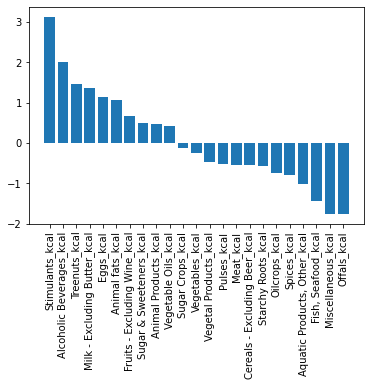

In [6]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [7]:
y = kcal_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.001404899094273505 (0.0005225618389108243)
RMSE: 0.03678382658062729 (0.007200638607779366)
MAE: 0.028040090697055754 (0.004954104796497127)
R2: 0.39420508268247145


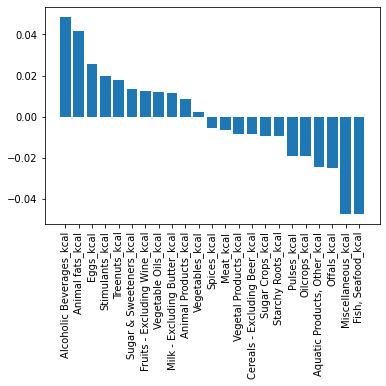

In [8]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [9]:
y = kcal_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 2.674739348993517 (0.9313677800932479)
RMSE: 1.6125761903955027 (0.2726488202120903)
MAE: 1.1557020161673 (0.15348437998385941)
R2: 0.16667990539295852


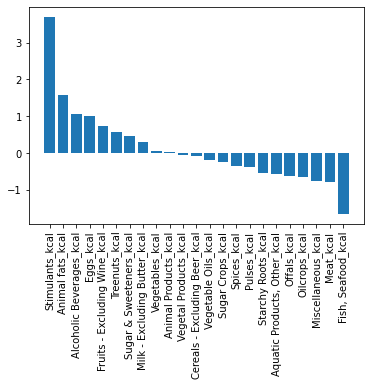

In [10]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Protein Supply dataset

In [11]:
# Removing Country column due to it being categorical and not providing much information
protein_df = protein_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [12]:
# Separating X and y and scaling X due to data distribution
X = protein_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [13]:
y = protein_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.001396256942086 (1.185487080459285)
RMSE: 1.6959902883484552 (0.3535720559798383)
MAE: 1.2833857756710736 (0.2246375186048517)
R2: 0.43430019140570825


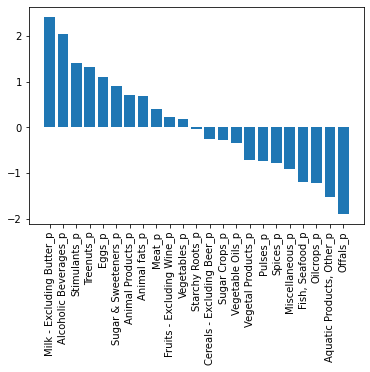

In [14]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [15]:
y = protein_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0013772086842114774 (0.0004360480642326853)
RMSE: 0.03664337400381275 (0.005871271227611386)
MAE: 0.028413871344960612 (0.004081042945811387)
R2: 0.3957307379706343


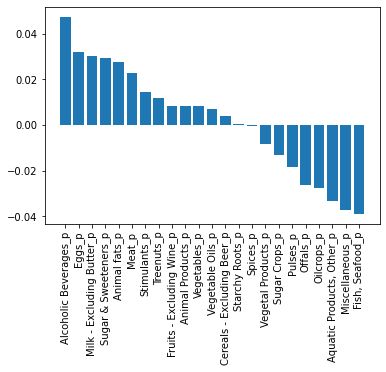

In [16]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [17]:
y = protein_df['Recovered']*5

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 71.14946600923905 (29.657242172660677)
RMSE: 8.269138828758837 (1.664574732462301)
MAE: 6.072716533701944 (1.1262051016310557)
R2: 0.1238909625906762


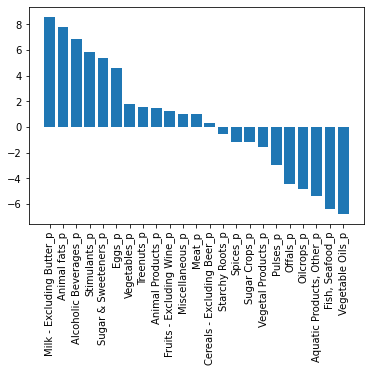

In [18]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Food Supply in Kg dataset

In [19]:
# Removing Country column due to it being categorical and not providing much information
kg_df = kg_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [20]:
# Separating X and y and scaling X due to data distribution
X = kg_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [21]:
y = kg_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.3520550375164775 (1.3840582861155803)
RMSE: 1.795165427241809 (0.3597723257175459)
MAE: 1.3505605388270048 (0.22779084172238975)
R2: 0.3739765493492171


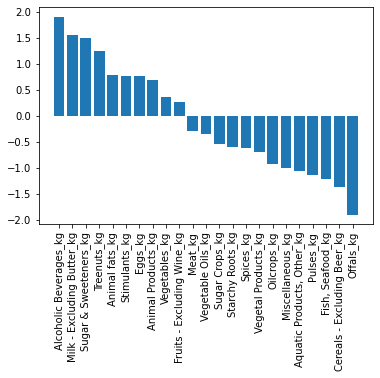

In [22]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [23]:
y = kg_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0013990013357016965 (0.0005604854072073248)
RMSE: 0.036595807848861614 (0.007729694922239488)
MAE: 0.028328973689347482 (0.006247006647082336)
R2: 0.3980518721305246


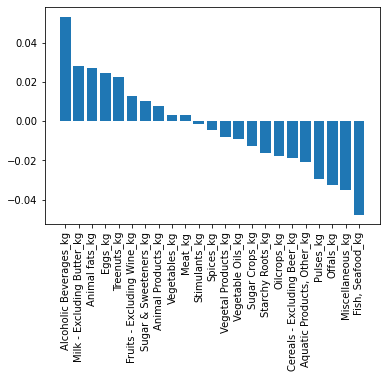

In [24]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [25]:
y = kg_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.1248587943054527 (1.4069634804756488)
RMSE: 1.7296788350921344 (0.3647875021704691)
MAE: 1.2527234696020677 (0.22280043066761362)
R2: 0.06463806670056671


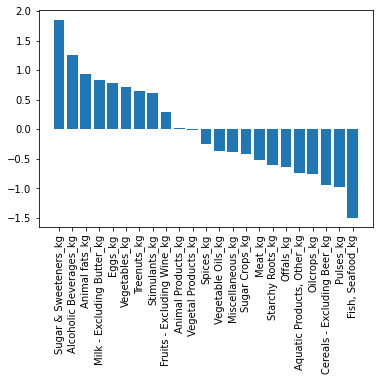

In [26]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Fat Supply dataset

In [27]:
# Removing Country column due to it being categorical and not providing much information
fat_df = fat_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [28]:
# Separating X and y and scaling X due to data distribution
X = fat_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [29]:
y = fat_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.134173025698727 (1.2398770825446654)
RMSE: 1.7337193995674134 (0.35831560008229496)
MAE: 1.3490968260543474 (0.23480678100718486)
R2: 0.4195620923524935


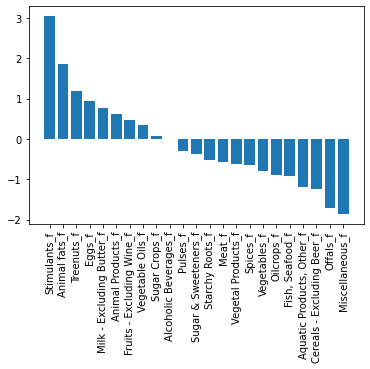

In [30]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [31]:
y = fat_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0015630242085050657 (0.0005912643160213672)
RMSE: 0.0387845702181389 (0.007666897775457742)
MAE: 0.029929193832161666 (0.004896993825841912)
R2: 0.3262200968469974


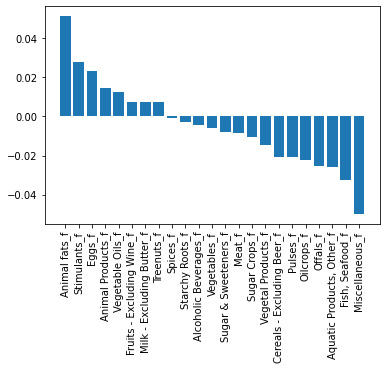

In [32]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [33]:
y = fat_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = Ridge()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 2.5006681520194918 (1.0306335043129482)
RMSE: 1.5489305114662426 (0.3185630591710461)
MAE: 1.1421845530052512 (0.18205776270461888)
R2: 0.2517360527904843


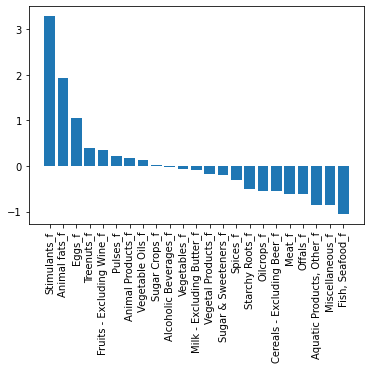

In [34]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()